In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [11]:
# Load the CSV file
file_path = "../data/diamond-v0.csv" 
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [15]:
missing_values= df.isnull().sum()
missing_values

cut              0
color            0
clarity          0
carat            0
depth            0
table            0
price            0
x (Premium)      0
z (Very Good)    0
y (Good)         0
dtype: int64

In [17]:
duplicated_count = df.duplicated().sum()
duplicated_count = df.loc[df.duplicated().sum()]
duplicated_count

cut              Fair
color               J
clarity           SI1
carat             1.0
depth            65.3
table            57.0
price            3175
x (Premium)      6.33
z (Very Good)    4.08
y (Good)         6.12
Name: 146, dtype: object

In [23]:
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col} : {df[col].unique().sum()} unique value")
        print(df[col].value_counts().head())
    print("-" * 20)

cut : FairGoodIdealPremiumVery Good unique value
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
--------------------
color : EFHGJID unique value
color
G    11292
E     9797
F     9542
H     8304
D     6775
Name: count, dtype: int64
--------------------
clarity : VS2SI2SI1I1VVS1VS1IFVVS2 unique value
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
Name: count, dtype: int64
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------
--------------------


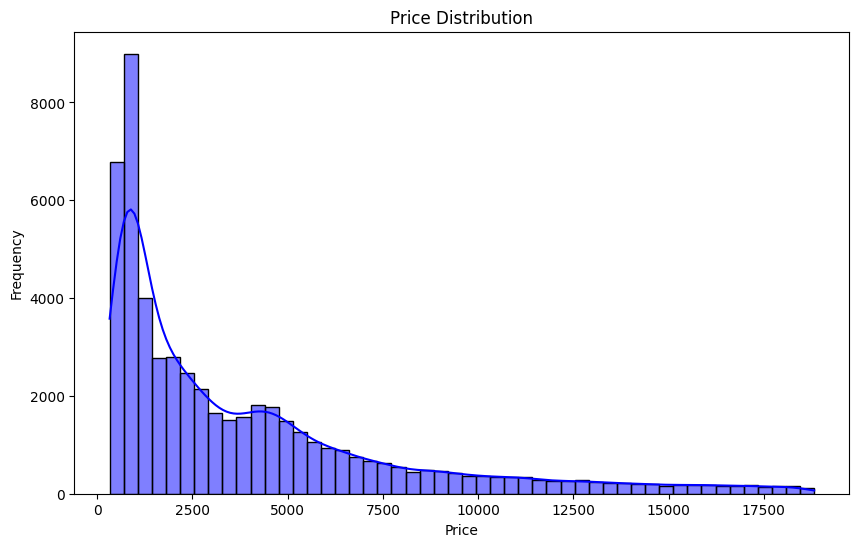

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
lowest_price = df['price'].min()
highest_price = df['price'].max()

lowest_price_frequency = df['price'].value_counts()[lowest_price]
highest_price_frequency = df['price'].value_counts()[highest_price]
highest_price_loc = df[df['price'] == highest_price]

print(f"Lowest Price: {lowest_price}, Frequency: {lowest_price_frequency}")
print(f"Highest Price: {highest_price}, Frequency: {highest_price_frequency}")
highest_price_loc

Lowest Price: 326, Frequency: 2
Highest Price: 18823, Frequency: 1


,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
36037,Premium,I,VS2,2.29,60.8,60.0,18823,8.5,5.16,8.47


In [32]:
df.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [41]:

# Define categorical features
categorical_features = ['cut', 'color', 'clarity']

# Convert categorical features to numerical features using label encoding

label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

df.tail(380)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
53560,4,1,3,0.76,62.0,54.0,2530,5.84,3.64,5.91
53561,4,1,2,0.71,63.0,58.0,2531,5.68,3.59,5.72
53562,4,5,7,0.72,61.7,55.0,2532,5.76,3.57,5.81
53563,4,6,6,0.77,62.8,58.0,2532,5.78,3.65,5.84
53564,4,2,2,0.76,62.7,57.0,2533,5.81,3.66,5.86
...,...,...,...,...,...,...,...,...,...,...
53935,4,1,5,0.70,62.8,60.0,2755,5.59,3.53,5.65
53936,4,0,4,0.70,63.1,59.0,2755,5.67,3.55,5.58
53937,4,1,5,0.70,60.5,59.0,2757,5.71,3.47,5.76
53938,4,1,5,0.70,61.2,59.0,2757,5.69,3.49,5.72


In [42]:
df.to_csv("../data/processed-v0.csv")